**Bidirectional LSTM**

In [1]:
import pandas as pd
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.utils import pad_sequences
from keras.layers import Embedding, LSTM, Bidirectional,Dense,Dropout
from keras.datasets import imdb

In [2]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)
maxlen=200

17464789/17464789 [==============================] - 1s 0us/step


In [3]:
import numpy as np


In [4]:
x_train=pad_sequences(x_train,maxlen=maxlen)
x_test=pad_sequences(x_test,maxlen=maxlen)
y_traint=np.array(x_test)
y_test=np.array(y_test)

In [5]:
n_unique_words=10000
model=Sequential()
model.add(Embedding(n_unique_words,164,input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1,activation="sigmoid"))
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=5,validation_data=[x_test,y_test])

Epoch 1/5
782/782 [==============================] - 98s 111ms/step - loss: 0.4071 - accuracy: 0.8157 - val_loss: 0.3399 - val_accuracy: 0.8578
Epoch 2/5
782/782 [==============================] - 29s 37ms/step - loss: 0.2556 - accuracy: 0.9013 - val_loss: 0.3063 - val_accuracy: 0.8703
Epoch 3/5
782/782 [==============================] - 24s 30ms/step - loss: 0.1889 - accuracy: 0.9288 - val_loss: 0.3234 - val_accuracy: 0.8716
Epoch 4/5
782/782 [==============================] - 23s 30ms/step - loss: 0.1427 - accuracy: 0.9480 - val_loss: 0.4336 - val_accuracy: 0.8388
Epoch 5/5
782/782 [==============================] - 25s 32ms/step - loss: 0.0993 - accuracy: 0.9650 - val_loss: 0.4947 - val_accuracy: 0.8640


In [6]:
print(history.history["loss"])
print(history.history["accuracy"])

[0.40714964270591736, 0.25555509328842163, 0.1888810098171234, 0.1426718682050705, 0.09930215030908585]
[0.8157200217247009, 0.9012799859046936, 0.9287999868392944, 0.9479600191116333, 0.9649999737739563]


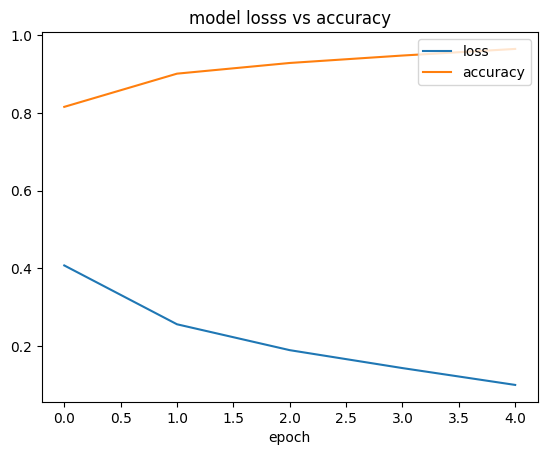

In [7]:
from matplotlib import pyplot
pyplot.plot(history.history["loss"])
pyplot.plot(history.history["accuracy"])
pyplot.title("model losss vs accuracy")
pyplot.legend(["loss","accuracy"],loc='upper right')
pyplot.xlabel('epoch')
pyplot.show()

**Computer vision**

In [8]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


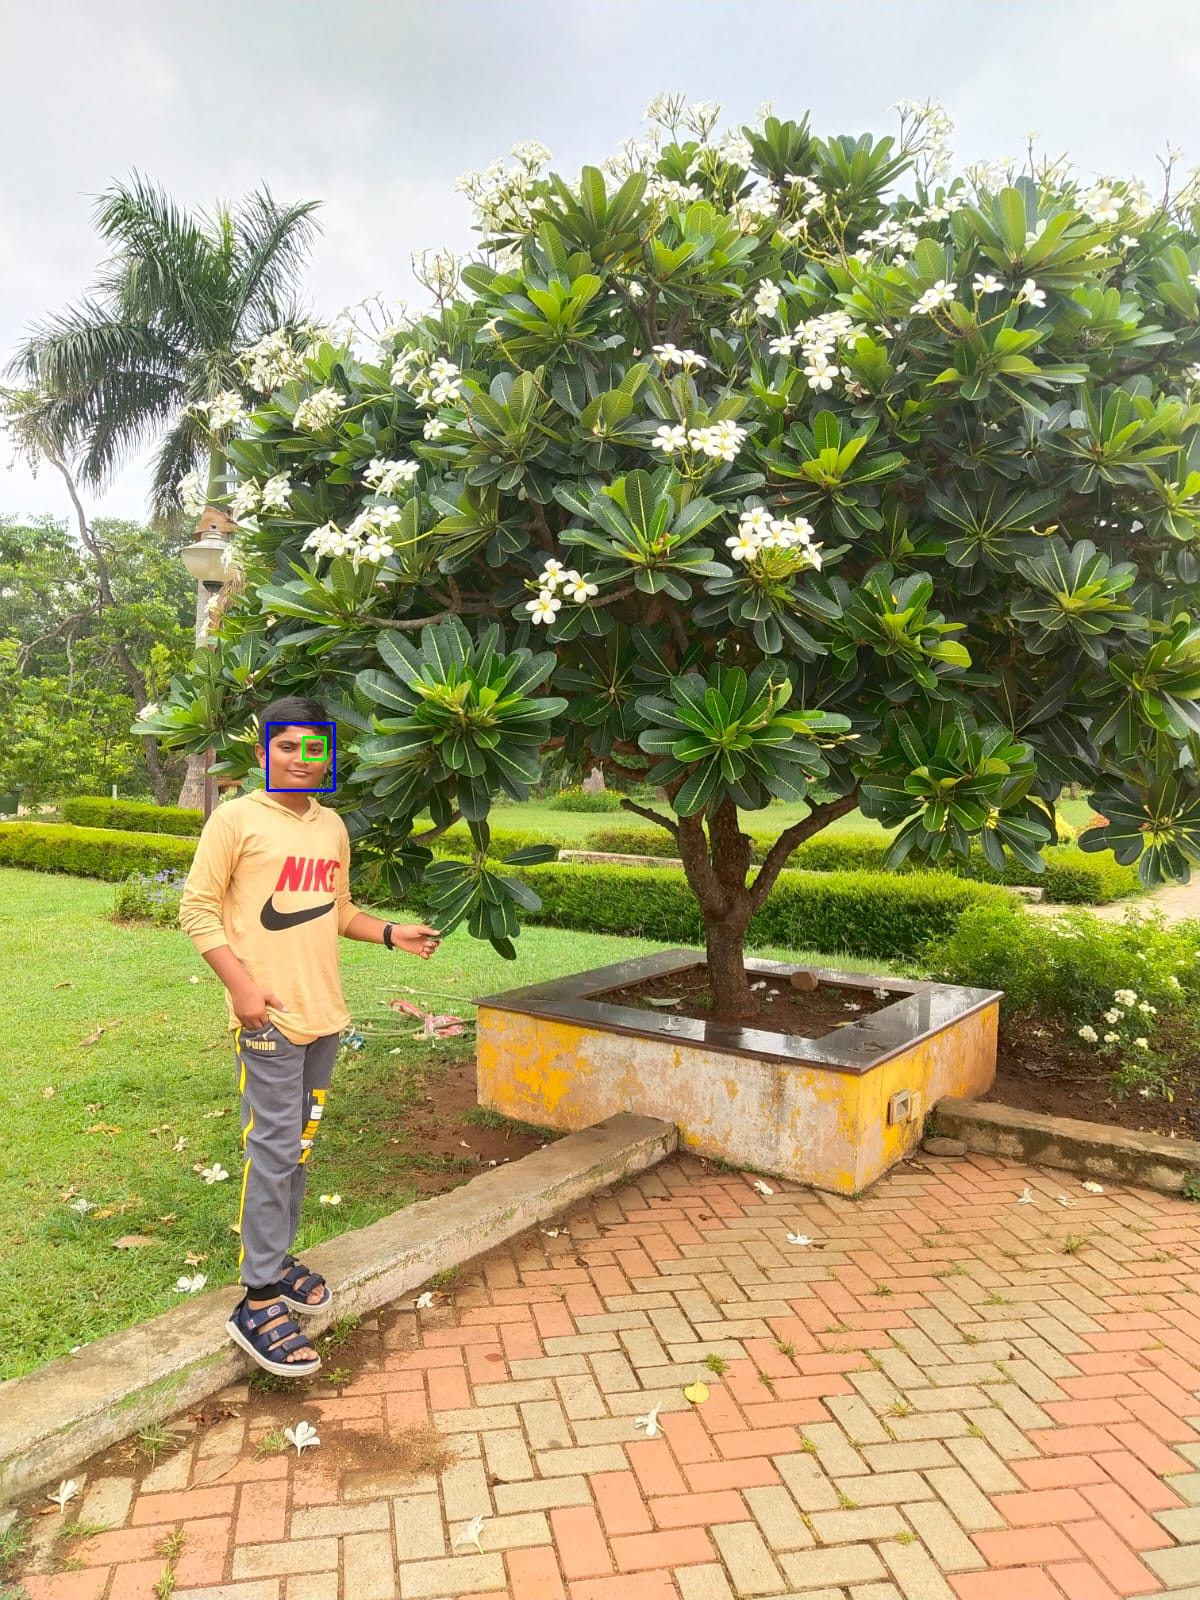

In [13]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2
face_cascade = cv2.CascadeClassifier("/content/haarcascade_frontalface_default.xml")
eye_cascade = cv2.CascadeClassifier("/content/haarcascade_eye.xml")
#save the image(i) in the same directory
img = cv2.imread("/content/sanjay.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()

**Autoencoders**

In [ ]:
from keras.models import Sequential
from keras.layers import MaxPooling2D, UpSampling2D, Conv2D

In [ ]:
model = Sequential()
model.add(Conv2D(30,2,activation="relu", padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,padding="same"))
model.add(Conv2D(15,2,activation="relu",padding = 'same'))
model.add(MaxPooling2D(2,padding="same"))
model.add(Conv2D(15,2,activation="relu",padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30,2,activation="relu",padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,2,activation="sigmoid",padding = 'same'))
model.compile(loss="binary_crossentropy",optimizer="adam")
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 30)        150       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 15)        1815      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_12 (Conv2D)          (None, 7, 7, 15)          915       
                                                                 
 up_sampling2d_4 (UpSampling  (None, 14, 14, 15)      

In [ ]:
from keras.datasets import mnist
import numpy as np

In [ ]:
(x_train,_),(x_test,_)=mnist.load_data()
x_train=x_train.astype("float32")/255.0
x_test=x_test.astype("float32")/255.0
x_train=np.reshape(x_train,(len(x_train),28,28,1))
x_test=np.reshape(x_test,(len(x_test),28,28,1))

In [ ]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [ ]:

model.fit(x_train,x_train,epochs=5,validation_data=[x_test,x_test])

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0812 - val_loss: 0.0797
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0803 - val_loss: 0.0789
Epoch 3/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0796 - val_loss: 0.0786
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0791 - val_loss: 0.0778
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0786 - val_loss: 0.0774


313/313 [==============================] - 1s 4ms/step


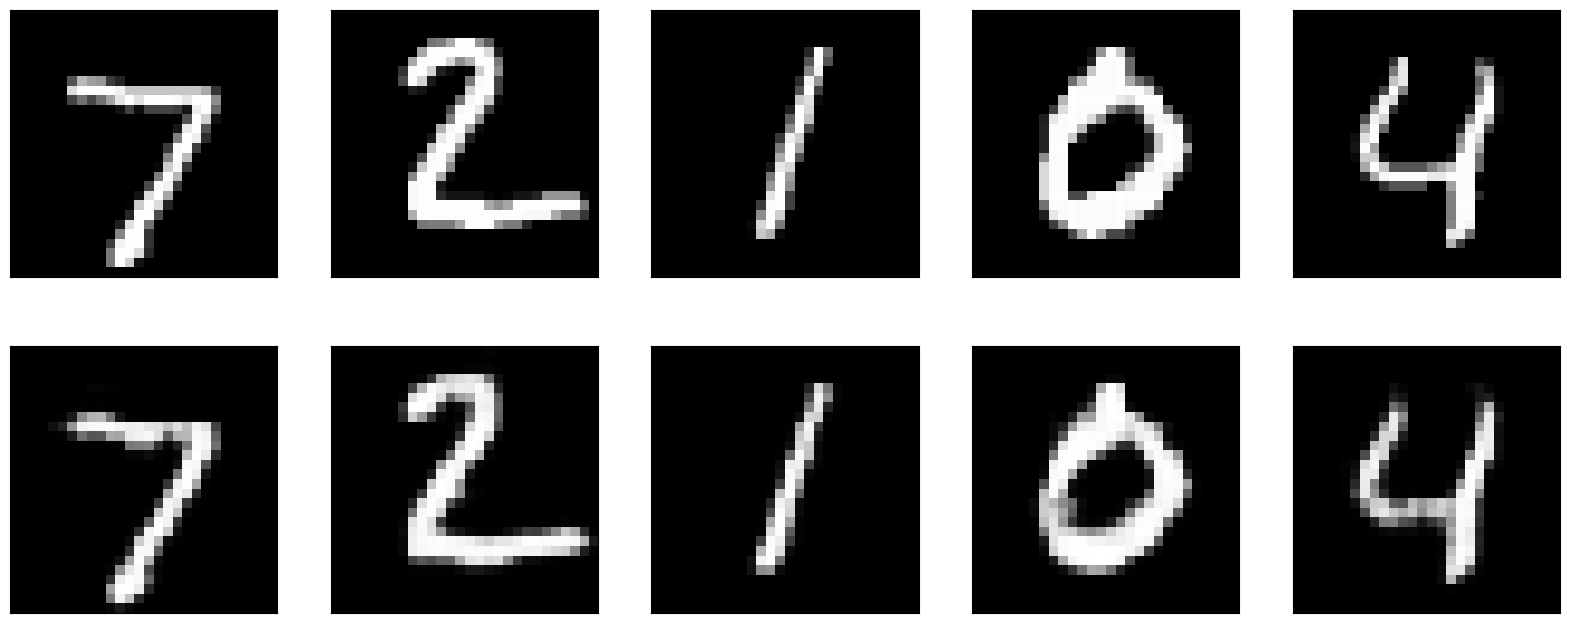

In [ ]:
import matplotlib.pyplot as plt
pred=model.predict(x_test)
plt.figure(figsize=(20,8))
for i in range(5):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(x_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax=plt.subplot(2,5,i+1+5)
    plt.imshow(pred[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [ ]:
noise_factor=0.7
x_train_noisy=x_train + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_train.shape)
x_test_noisy=x_test + noise_factor * np.random.normal(loc=0.0,scale=1.0,size=x_test.shape)
x_train_noisy=np.clip(x_train_noisy,0.,1.)
x_test_noisy=np.clip(x_test_noisy,0.,1.)
    

In [ ]:
model = Sequential()
model.add(Conv2D(30,2,activation="relu", padding='same',input_shape=(28,28,1)))
model.add(MaxPooling2D(2,padding="same"))
model.add(Conv2D(15,2,activation="relu",padding = 'same'))
model.add(MaxPooling2D(2,padding="same"))
model.add(Conv2D(15,2,activation="relu",padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(30,2,activation="relu",padding = 'same'))
model.add(UpSampling2D(2))
model.add(Conv2D(1,2,activation="sigmoid",padding = 'same'))
model.compile(loss="binary_crossentropy",optimizer="adam")
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 30)        150       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 15)        1815      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 7, 7, 15)         0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 7, 7, 15)          915       
                                                                 
 up_sampling2d_8 (UpSampling  (None, 14, 14, 15)      

In [ ]:
model.fit(x_train_noisy,x_train,epochs=5,validation_data=[x_test_noisy,x_test])

Epoch 1/5
1875/1875 [==============================] - 12s 5ms/step - loss: 0.2287 - val_loss: 0.2014
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1979 - val_loss: 0.1950
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1925 - val_loss: 0.1895
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1894 - val_loss: 0.1901
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1873 - val_loss: 0.1851


313/313 [==============================] - 1s 2ms/step


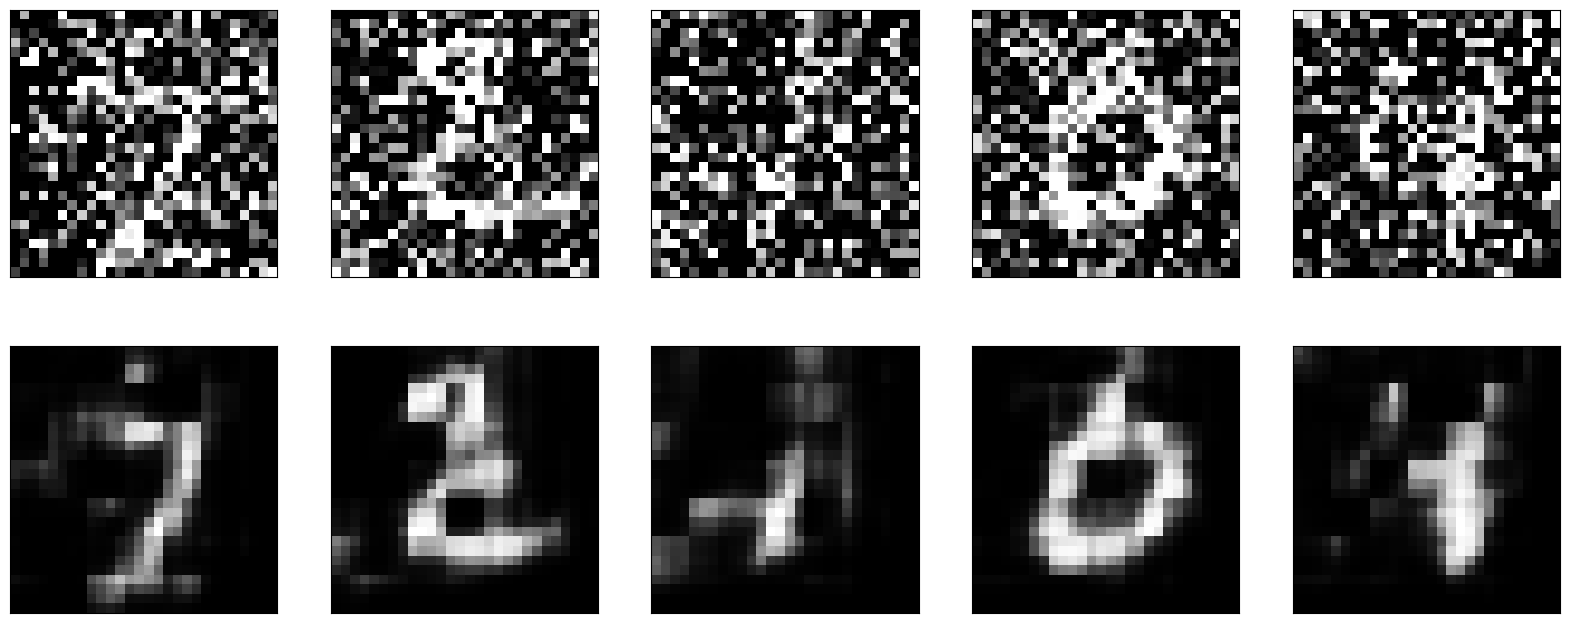

In [ ]:
import matplotlib.pyplot as plt
pred=model.predict(x_test_noisy)
plt.figure(figsize=(20,8))
for i in range(5):
    ax=plt.subplot(2,5,i+1)
    plt.imshow(x_test_noisy[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax=plt.subplot(2,5,i+1+5)
    plt.imshow(pred[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**RBM**

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
cd/content/drive/My Drive/Dataset

/content/drive/My Drive/Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
movies=pd.read_csv("movies.csv")
movies

movieId                               title  \
0            1                    Toy Story (1995)   
1            2                      Jumanji (1995)   
2            3             Grumpier Old Men (1995)   
3            4            Waiting to Exhale (1995)   
4            5  Father of the Bride Part II (1995)   
...        ...                                 ...   
62418   209157                           We (2018)   
62419   209159           Window of the Soul (2001)   
62420   209163                    Bad Poems (2018)   
62421   209169                 A Girl Thing (2001)   
62422   209171      Women of Devil's Island (1962)   

                                            genres  
0      Adventure|Animation|Children|Comedy|Fantasy  
1                       Adventure|Children|Fantasy  
2                                   Comedy|Romance  
3                             Comedy|Drama|Romance  
4                                           Comedy  
...                                            ...  
62418                                        Drama  
62419                                  Documentary  
62420                                 Comedy|Drama  
62421                           (no genres listed)  
62422                       Action|Adventure|Drama  

[62423 rows x 3 columns]

In [ ]:
ratings= pd.read_csv('ratings.csv')  
ratings

userId  movieId  rating   timestamp
0              1      296     5.0  1147880044
1              1      306     3.5  1147868817
2              1      307     5.0  1147868828
3              1      665     5.0  1147878820
4              1      899     3.5  1147868510
...          ...      ...     ...         ...
25000090  162541    50872     4.5  1240953372
25000091  162541    55768     2.5  1240951998
25000092  162541    56176     2.0  1240950697
25000093  162541    58559     4.0  1240953434
25000094  162541    63876     5.0  1240952515

[25000095 rows x 4 columns]

In [ ]:
movies.columns = ['MovieID', 'Title', 'Genres']
ratings.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']

In [ ]:
movies["List Index"]=movies.index
movies.head()


MovieID                               Title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        Genres  List Index  
0  Adventure|Animation|Children|Comedy|Fantasy           0  
1                   Adventure|Children|Fantasy           1  
2                               Comedy|Romance           2  
3                         Comedy|Drama|Romance           3  
4                                       Comedy           4

In [ ]:
merged_data=movies.merge(ratings,on="MovieID")
merged_data=merged_data.drop('Timestamp',axis=1).drop("Title",axis=1).drop("Genres",axis=1)
merged_data.head


<bound method NDFrame.head of           MovieID  List Index  UserID  Rating
0               1           0       2     3.5
1               1           0       3     4.0
2               1           0       4     3.0
3               1           0       5     4.0
4               1           0       8     4.0
...           ...         ...     ...     ...
25000090   209157       62418  119571     1.5
25000091   209159       62419  115835     3.0
25000092   209163       62420    6964     4.5
25000093   209169       62421  119571     3.0
25000094   209171       62422  119571     3.0

[25000095 rows x 4 columns]>

In [ ]:
userGroup = merged_data.groupby('UserID')
userGroup['Rating'].apply(lambda x: x.astype(int))
userGroup.first().head()

<ipython-input-10-4423d58b176c>:2: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  userGroup['Rating'].apply(lambda x: x.astype(int))


MovieID  List Index  Rating
UserID                             
1           296         292     5.0
2             1           0     3.5
3             1           0     4.0
4             1           0     3.0
5             1           0     4.0

In [ ]:
amountOfUsedUsers=1000
train_X=[]
for userID, curUser in userGroup:
    temp=[0]*len(movies)
    for num,movie in curUser.iterrows():
        temp[movie['List Index'].astype(int)]=movie["Rating"].astype(int)/5.0
    train_X.append(temp)
    if amountOfUsedUsers==0:
        break
    amountOfUsedUsers-=1

In [ ]:
import tensorflow
import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

hiddenUnits = 20
visibleUnits = len(movies)
vb = tf.placeholder("float", [visibleUnits]) #Number of unique movies
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])

Instructions for updating:
non-resource variables are not supported in the long term


In [ ]:
v0 = tf.placeholder("float", [None, visibleUnits])
_h0= tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))

_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb) 
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)

In [ ]:
alpha = 1.0
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

Instructions for updating:
Use `tf.cast` instead.


In [ ]:
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

In [ ]:
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
cur_vb = np.zeros([visibleUnits], np.float32)
cur_hb = np.zeros([hiddenUnits], np.float32)
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
prv_vb = np.zeros([visibleUnits], np.float32)
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

0.0945875
0.050633315
0.034416813
0.025820522
0.018031139
0.00942971
0.0055971295
0.0044538835
0.003541959
0.0031565507
0.003029305
0.0029653125
0.0029080254
0.0028735246
0.0027995075


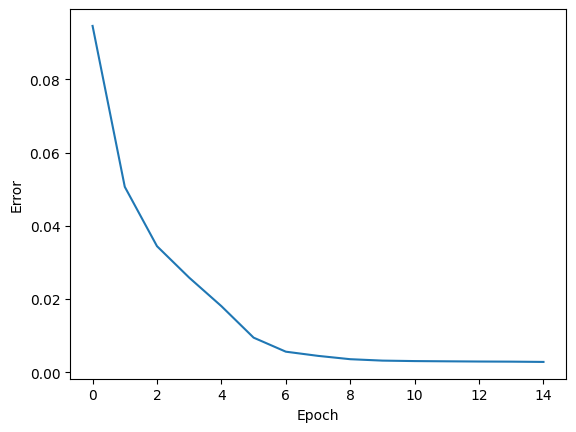

In [ ]:
epochs = 15
batchsize = 100
errors = []
for i in range(epochs):
    for start, end in zip( range(0, len(train_X), batchsize), range(batchsize, len(train_X), batchsize)):
        batch = train_X[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_nb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_nb
    errors.append(sess.run(err_sum, feed_dict={v0: train_X, W: cur_w, vb: cur_vb, hb: cur_nb}))
    print (errors[-1])
plt.plot(errors)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [ ]:
inputUser = [train_X[75]]

In [ ]:
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})

In [ ]:
scored_movies_df_75 = movies
scored_movies_df_75["Recommendation Score"] = rec[0]
scored_movies_df_75.sort_values(["Recommendation Score"], ascending=False).head(20)

MovieID                                              Title  \
522        527                            Schindler's List (1993)   
2867      2959                                  Fight Club (1999)   
7028      7153  Lord of the Rings: The Return of the King, The...   
4201      4306                                       Shrek (2001)   
0            1                                   Toy Story (1995)   
1620      1682                            Truman Show, The (1998)   
2238      2329                          American History X (1998)   
2480      2571                                 Matrix, The (1999)   
2670      2762                            Sixth Sense, The (1999)   
1237      1270                          Back to the Future (1985)   
1168      1198  Raiders of the Lost Ark (Indiana Jones and the...   
4887      4993  Lord of the Rings: The Fellowship of the Ring,...   
3892      3996  Crouching Tiger, Hidden Dragon (Wo hu cang lon...   
10002    33794                               Batman Begins (2005)   
1939      2028                         Saving Private Ryan (1998)   
3479      3578                                   Gladiator (2000)   
6751      6874                           Kill Bill: Vol. 1 (2003)   
3692      3793                                       X-Men (2000)   
536        541                                Blade Runner (1982)   
4857      4963                              Ocean's Eleven (2001)   

                                                  Genres  List Index  \
522                                            Drama|War         522   
2867                         Action|Crime|Drama|Thriller        2867   
7028                      Action|Adventure|Drama|Fantasy        7028   
4201   Adventure|Animation|Children|Comedy|Fantasy|Ro...        4201   
0            Adventure|Animation|Children|Comedy|Fantasy           0   
1620                                 Comedy|Drama|Sci-Fi        1620   
2238                                         Crime|Drama        2238   
2480                              Action|Sci-Fi|Thriller        2480   
2670                                Drama|Horror|Mystery        2670   
1237                             Adventure|Comedy|Sci-Fi        1237   
1168                                    Action|Adventure        1168   
4887                                   Adventure|Fantasy        4887   
3892                                Action|Drama|Romance        3892   
10002                                  Action|Crime|IMAX       10002   
1939                                    Action|Drama|War        1939   
3479                              Action|Adventure|Drama        3479   
6751                               Action|Crime|Thriller        6751   
3692                             Action|Adventure|Sci-Fi        3692   
536                               Action|Sci-Fi|Thriller         536   
4857                                      Crime|Thriller        4857   

       Recommendation Score  
522                0.701163  
2867               0.665935  
7028               0.665671  
4201               0.652535  
0                  0.618588  
1620               0.611535  
2238               0.609671  
2480               0.600740  
2670               0.575116  
1237               0.573405  
1168               0.561991  
4887               0.547096  
3892               0.535788  
10002              0.535102  
1939               0.518542  
3479               0.511689  
6751               0.500153  
3692               0.490108  
536                0.487725  
4857               0.479328

In [ ]:
movies_data_75 = merged_data[merged_data['UserID']==215]
movies_data_75.head()

MovieID  List Index  UserID  Rating
81556         3           2     215     1.0
320380       25          24     215     4.0
413133       33          32     215     5.0
465394       37          36     215     5.0
656235       58          57     215     1.0

In [ ]:
merged_data_75 = scored_movies_df_75.merge(movies_data_75, on='MovieID', how='outer')
merged_data_75 = merged_data_75.drop('List Index_y', axis=1).drop('UserID', axis=1)

In [ ]:
merged_data_75.sort_values(["Recommendation Score"], ascending=False).head(20)

MovieID                                              Title  \
522        527                            Schindler's List (1993)   
2867      2959                                  Fight Club (1999)   
7028      7153  Lord of the Rings: The Return of the King, The...   
4201      4306                                       Shrek (2001)   
0            1                                   Toy Story (1995)   
1620      1682                            Truman Show, The (1998)   
2238      2329                          American History X (1998)   
2480      2571                                 Matrix, The (1999)   
2670      2762                            Sixth Sense, The (1999)   
1237      1270                          Back to the Future (1985)   
1168      1198  Raiders of the Lost Ark (Indiana Jones and the...   
4887      4993  Lord of the Rings: The Fellowship of the Ring,...   
3892      3996  Crouching Tiger, Hidden Dragon (Wo hu cang lon...   
10002    33794                               Batman Begins (2005)   
1939      2028                         Saving Private Ryan (1998)   
3479      3578                                   Gladiator (2000)   
6751      6874                           Kill Bill: Vol. 1 (2003)   
3692      3793                                       X-Men (2000)   
536        541                                Blade Runner (1982)   
4857      4963                              Ocean's Eleven (2001)   

                                                  Genres  List Index_x  \
522                                            Drama|War           522   
2867                         Action|Crime|Drama|Thriller          2867   
7028                      Action|Adventure|Drama|Fantasy          7028   
4201   Adventure|Animation|Children|Comedy|Fantasy|Ro...          4201   
0            Adventure|Animation|Children|Comedy|Fantasy             0   
1620                                 Comedy|Drama|Sci-Fi          1620   
2238                                         Crime|Drama          2238   
2480                              Action|Sci-Fi|Thriller          2480   
2670                                Drama|Horror|Mystery          2670   
1237                             Adventure|Comedy|Sci-Fi          1237   
1168                                    Action|Adventure          1168   
4887                                   Adventure|Fantasy          4887   
3892                                Action|Drama|Romance          3892   
10002                                  Action|Crime|IMAX         10002   
1939                                    Action|Drama|War          1939   
3479                              Action|Adventure|Drama          3479   
6751                               Action|Crime|Thriller          6751   
3692                             Action|Adventure|Sci-Fi          3692   
536                               Action|Sci-Fi|Thriller           536   
4857                                      Crime|Thriller          4857   

       Recommendation Score  Rating  
522                0.701163     NaN  
2867               0.665935     NaN  
7028               0.665671     NaN  
4201               0.652535     NaN  
0                  0.618588     NaN  
1620               0.611535     NaN  
2238               0.609671     NaN  
2480               0.600740     NaN  
2670               0.575116     NaN  
1237               0.573405     NaN  
1168               0.561991     NaN  
4887               0.547096     NaN  
3892               0.535788     NaN  
10002              0.535102     NaN  
1939               0.518542     NaN  
3479               0.511689     NaN  
6751               0.500153     NaN  
3692               0.490108     NaN  
536                0.487725     NaN  
4857               0.479328     NaN

**Data Augmentation**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import pathlib


In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
archive = tf.keras.utils.get_file(origin=dataset_url, extract=True)
data_dir = pathlib.Path(archive).with_suffix('')
list(data_dir.glob('*/*.jpg'))[:5]


[PosixPath('/root/.keras/datasets/flower_photos/sunflowers/3894586562_5dbbdc4354_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/15081164641_45a7b92b3a_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/6166888942_7058198713_m.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/4746648726_e37a2de16d_n.jpg'),
 PosixPath('/root/.keras/datasets/flower_photos/sunflowers/9240129413_f240ce7866_n.jpg')]

In [ ]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}


In [ ]:
img = cv2.imread(str(flowers_images_dict['roses'][0]))
img.shape
cv2.resize(img,(180,180)).shape
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])
X = np.array(X)
y = np.array(y)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255


In [ ]:
num_classes = 5

model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test), epochs=30)    



Epoch 1/30
86/86 [==============================] - 17s 48ms/step - loss: 1.3889 - accuracy: 0.4215 - val_loss: 1.1475 - val_accuracy: 0.5229
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 0.9892 - accuracy: 0.6152 - val_loss: 1.0624 - val_accuracy: 0.5817
Epoch 3/30
86/86 [==============================] - 2s 23ms/step - loss: 0.8183 - accuracy: 0.6893 - val_loss: 0.9516 - val_accuracy: 0.6362
Epoch 4/30
86/86 [==============================] - 3s 36ms/step - loss: 0.5726 - accuracy: 0.7954 - val_loss: 0.9648 - val_accuracy: 0.6590
Epoch 5/30
86/86 [==============================] - 2s 28ms/step - loss: 0.3508 - accuracy: 0.8779 - val_loss: 1.3171 - val_accuracy: 0.6351
Epoch 6/30
86/86 [==============================] - 2s 25ms/step - loss: 0.1989 - accuracy: 0.9342 - val_loss: 1.4563 - val_accuracy: 0.6264
Epoch 7/30
86/86 [==============================] - 3s 30ms/step - loss: 0.1086 - accuracy: 0.9684 - val_loss: 1.6768 - val_accuracy: 0.6536
Epoch 8/30
8

In [ ]:
model.metrics_names

['loss', 'accuracy']

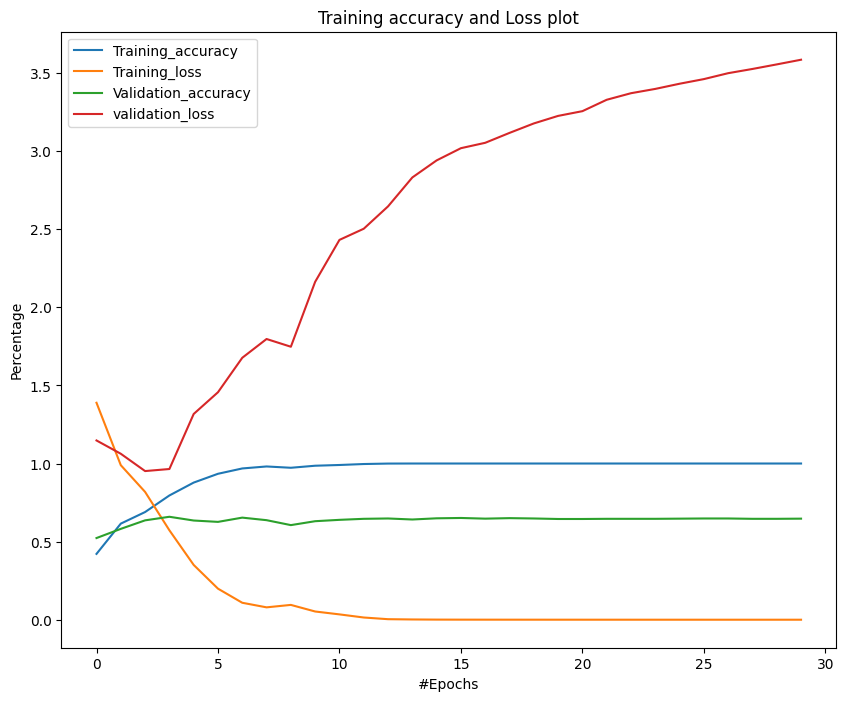

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,30),history.history['accuracy'],label='Training_accuracy')
plt.plot(np.arange(0,30),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,30),history.history['val_accuracy'],label='Validation_accuracy')
plt.plot(np.arange(0,30),history.history['val_loss'],label='validation_loss')
plt.xlabel('#Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.title('Training accuracy and Loss plot')
plt.show()

Image Dimensions were: 3670x180


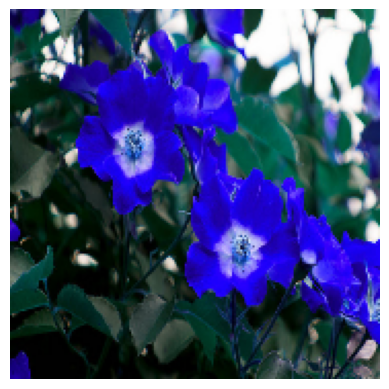

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.6),
    layers.experimental.preprocessing.RandomZoom(0.5),
  ]
)
plt.axis('off')
print("Image Dimensions were: {0}x{1}".format(X.shape[0], X.shape[1]))
plt.imshow(X[1])



Resized Dimensions were: 180x180


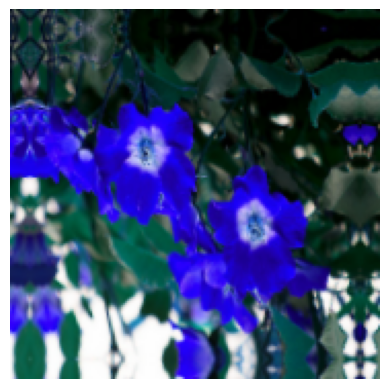

In [ ]:
plt.axis('off')
img=data_augmentation(X)[1].numpy().astype("uint8")
plt.imshow(img)
print("Resized Dimensions were: {0}x{1}".format(img.shape[0], img.shape[1]))

In [ ]:
model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
history=model.fit(X_train_scaled, y_train,validation_data=(X_test_scaled,y_test), epochs=30)    



Epoch 1/30
86/86 [==============================] - 8s 37ms/step - loss: 1.3309 - accuracy: 0.4251 - val_loss: 1.1767 - val_accuracy: 0.5142
Epoch 2/30
86/86 [==============================] - 2s 24ms/step - loss: 1.0967 - accuracy: 0.5581 - val_loss: 0.9970 - val_accuracy: 0.5991
Epoch 3/30
86/86 [==============================] - 2s 26ms/step - loss: 0.9975 - accuracy: 0.5970 - val_loss: 1.0555 - val_accuracy: 0.6057
Epoch 4/30
86/86 [==============================] - 2s 28ms/step - loss: 0.9292 - accuracy: 0.6355 - val_loss: 0.8666 - val_accuracy: 0.6471
Epoch 5/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8877 - accuracy: 0.6446 - val_loss: 0.9064 - val_accuracy: 0.6373
Epoch 6/30
86/86 [==============================] - 2s 25ms/step - loss: 0.8656 - accuracy: 0.6588 - val_loss: 1.0738 - val_accuracy: 0.6002
Epoch 7/30
86/86 [==============================] - 2s 24ms/step - loss: 0.8486 - accuracy: 0.6588 - val_loss: 0.8660 - val_accuracy: 0.6754
Epoch 8/30
86

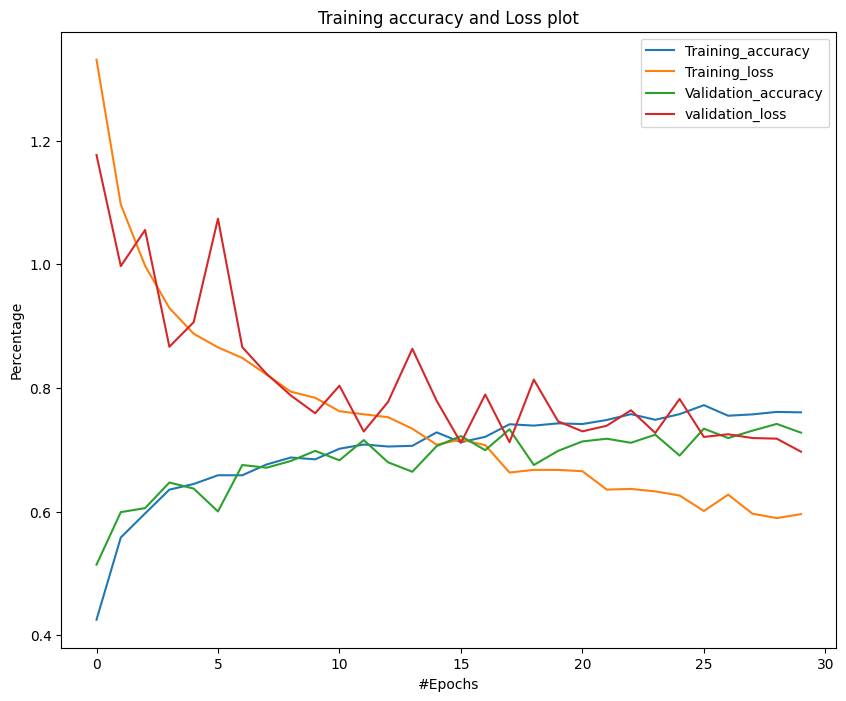

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(np.arange(0,30),history.history['accuracy'],label='Training_accuracy')
plt.plot(np.arange(0,30),history.history['loss'],label='Training_loss')
plt.plot(np.arange(0,30),history.history['val_accuracy'],label='Validation_accuracy')
plt.plot(np.arange(0,30),history.history['val_loss'],label='validation_loss')
plt.xlabel('#Epochs')
plt.ylabel('Percentage')
plt.legend()
plt.title('Training accuracy and Loss plot')
plt.show()

**Depth and Width**

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [17]:
dataset = pd.read_csv("gender_classification_v7.csv")


In [18]:

dataset.gender.value_counts()


Female    2501
Male      2500
Name: gender, dtype: int64

In [19]:
dataset.head()

long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1               11.8                 6.1          1          0   
1          0               14.0                 5.4          0          0   
2          0               11.8                 6.3          1          1   
3          0               14.4                 6.1          0          1   
4          1               13.5                 5.9          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1    Male  
1          1                          0  Female  
2          1                          1    Male  
3          1                          1    Male  
4          0                          0  Female

In [20]:
dataset.gender.replace({"Male":1, "Female":0}, inplace = True)

In [21]:
dataset.corr()

long_hair  forehead_width_cm  forehead_height_cm  \
long_hair                   1.000000          -0.006530           -0.017233   
forehead_width_cm          -0.006530           1.000000            0.088596   
forehead_height_cm         -0.017233           0.088596            1.000000   
nose_wide                   0.001216           0.251648            0.211655   
nose_long                   0.014432           0.257368            0.194120   
lips_thin                   0.011287           0.258564            0.205441   
distance_nose_to_lip_long  -0.025794           0.251328            0.215292   
gender                     -0.010767           0.334125            0.277190   

                           nose_wide  nose_long  lips_thin  \
long_hair                   0.001216   0.014432   0.011287   
forehead_width_cm           0.251648   0.257368   0.258564   
forehead_height_cm          0.211655   0.194120   0.205441   
nose_wide                   1.000000   0.565192   0.557615   
nose_long                   0.565192   1.000000   0.561229   
lips_thin                   0.557615   0.561229   1.000000   
distance_nose_to_lip_long   0.569303   0.559794   0.565312   
gender                      0.758502   0.744147   0.743319   

                           distance_nose_to_lip_long    gender  
long_hair                                  -0.025794 -0.010767  
forehead_width_cm                           0.251328  0.334125  
forehead_height_cm                          0.215292  0.277190  
nose_wide                                   0.569303  0.758502  
nose_long                                   0.559794  0.744147  
lips_thin                                   0.565312  0.743319  
distance_nose_to_lip_long                   1.000000  0.754850  
gender                                      0.754850  1.000000

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [23]:
dataset_scaled = dataset.copy()

In [24]:
cols_to_scale = ["forehead_width_cm", "forehead_height_cm"]
dataset_scaled[cols_to_scale] = scaler.fit_transform(dataset_scaled[cols_to_scale])
dataset_scaled.head()


long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1           0.097561                0.50          1          0   
1          0           0.634146                0.15          0          0   
2          0           0.097561                0.60          1          1   
3          0           0.731707                0.50          0          1   
4          1           0.512195                0.40          0          0   

   lips_thin  distance_nose_to_lip_long  gender  
0          1                          1       1  
1          1                          0       0  
2          1                          1       1  
3          1                          1       1  
4          0                          0       0

In [25]:
Y_s = dataset_scaled["gender"]
dataset_scaled.drop("gender",axis = "columns", inplace = True)


In [26]:
X_scaled = dataset_scaled.copy()
X_scaled.head()


long_hair  forehead_width_cm  forehead_height_cm  nose_wide  nose_long  \
0          1           0.097561                0.50          1          0   
1          0           0.634146                0.15          0          0   
2          0           0.097561                0.60          1          1   
3          0           0.731707                0.50          0          1   
4          1           0.512195                0.40          0          0   

   lips_thin  distance_nose_to_lip_long  
0          1                          1  
1          1                          0  
2          1                          1  
3          1                          1  
4          0                          0

In [27]:
X_train_s, X_test_s, Y_train_s, Y_test_s = train_test_split(X_scaled, Y_s, random_state = 0, test_size = 0.25)

In [28]:
clf2 = MLPClassifier(solver='lbfgs', alpha=0.001, hidden_layer_sizes=(5,5,2), max_iter = 100, activation = 'relu')
clf2.fit(X_train_s, Y_train_s)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPClassifier(alpha=0.001, hidden_layer_sizes=(5, 5, 2), max_iter=100,
              solver='lbfgs')

In [29]:

Y_pred_s = clf2.predict(X_test_s)

In [30]:
Y_pred_train_s = clf2.predict(X_train_s)

In [31]:
print(Y_pred_s[:100])
print(Y_pred_train_s[:100])

print(accuracy_score(Y_test_s, Y_pred_s))
print(accuracy_score(Y_train_s, Y_pred_train_s))
print(precision_score(Y_test_s, Y_pred_s))
print(recall_score(Y_test_s, Y_pred_s))
print(f1_score(Y_test_s, Y_pred_s))


[0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1
 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1
 1 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1]
[0 0 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1
 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 1 1 0 0 1
 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 1 1]
0.9672262190247801
0.9688
0.9671052631578947
0.9655172413793104
0.9663105998356615


area under the curve is  0.9671822967021163


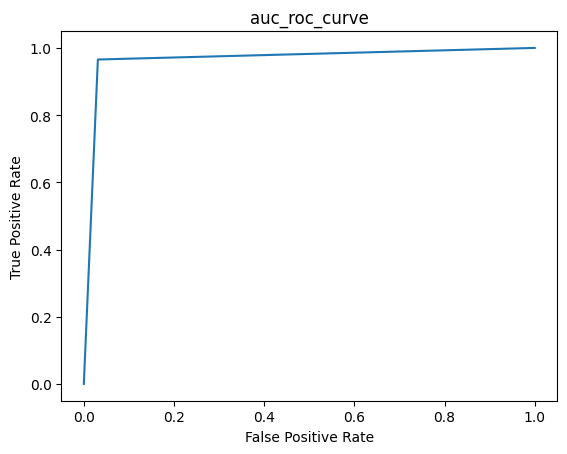

In [32]:
from sklearn import metrics
y_pred = clf2.predict(X_test_s)
fpr, tpr, _ = metrics.roc_curve(Y_test_s, Y_pred_s)
auc = metrics.roc_auc_score(Y_test_s, Y_pred_s)

print('area under the curve is ',auc)
plt.plot(fpr,tpr,label="3 neighbours , AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('auc_roc_curve')
plt.show()


In [33]:
from sklearn.model_selection import GridSearchCV
mlp_gs = MLPClassifier()

parameters = {
    'hidden_layer_sizes' : [(5,5,2), (15, 7,7,2), (10, 5, 2), (5, 2)],
    'activation': ['relu', 'logistic', 'tanh', 'identity'],
    'solver' : ['sgd', 'adam', 'lbfgs'],
    'learning_rate_init' : [0.01, 0.001, 0.05]    
}


In [34]:
clf = GridSearchCV(mlp_gs, parameters, cv = 5)
clf.fit(X_train_s, Y_train_s)


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:541: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optim

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic', 'tanh', 'identity'],
                         'hidden_layer_sizes': [(5, 5, 2), (15, 7, 7, 2),
                                                (10, 5, 2), (5, 2)],
                         'learning_rate_init': [0.01, 0.001, 0.05],
                         'solver': ['sgd', 'adam', 'lbfgs']})

In [35]:
print(clf.best_params_)

{'activation': 'tanh', 'hidden_layer_sizes': (15, 7, 7, 2), 'learning_rate_init': 0.001, 'solver': 'lbfgs'}


In [37]:
res = pd.DataFrame(clf.cv_results_)
res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.582183      0.673075         0.002177        0.000159   
1       0.663916      0.313471         0.002414        0.000138   
2       0.167104      0.193462         0.002417        0.000524   
3       1.540069      0.474076         0.003169        0.000405   
4       3.644266      0.784008         0.004458        0.001532   

  param_activation param_hidden_layer_sizes param_learning_rate_init  \
0             relu                (5, 5, 2)                     0.01   
1             relu                (5, 5, 2)                     0.01   
2             relu                (5, 5, 2)                     0.01   
3             relu                (5, 5, 2)                    0.001   
4             relu                (5, 5, 2)                    0.001   

  param_solver                                             params  \
0          sgd  {'activation': 'relu', 'hidden_layer_sizes': (...   
1         adam  {'activation': 'relu', 'hidden_layer_sizes': (...   
2        lbfgs  {'activation': 'relu', 'hidden_layer_sizes': (...   
3          sgd  {'activation': 'relu', 'hidden_layer_sizes': (...   
4         adam  {'activation': 'relu', 'hidden_layer_sizes': (...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0           0.976000           0.504000           0.504000           0.504000   
1           0.973333           0.969333           0.964000           0.962667   
2           0.970667           0.504000           0.504000           0.504000   
3           0.970667           0.964000           0.962667           0.496000   
4           0.977333           0.965333           0.964000           0.965333   

   split4_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.974667         0.692533        0.230906              127  
1           0.505333         0.874933        0.184839              112  
2           0.972000         0.690933        0.228946              129  
3           0.970667         0.872800        0.188429              117  
4           0.969333         0.968267        0.004874               50

In [38]:

res = res.sort_values('rank_test_score')
res.to_csv('grid_CV_results.csv')


In [39]:
res[['param_activation', 'param_hidden_layer_sizes',
       'param_learning_rate_init', 'param_solver','mean_test_score',
       'std_test_score', 'rank_test_score' ]].head()


param_activation param_hidden_layer_sizes param_learning_rate_init  \
86             tanh            (15, 7, 7, 2)                    0.001   
59         logistic               (10, 5, 2)                    0.001   
83             tanh            (15, 7, 7, 2)                     0.01   
26             relu               (10, 5, 2)                     0.05   
95             tanh               (10, 5, 2)                    0.001   

   param_solver  mean_test_score  std_test_score  rank_test_score  
86        lbfgs         0.973867        0.005879                1  
59        lbfgs         0.972267        0.006714                2  
83        lbfgs         0.972267        0.004333                2  
26        lbfgs         0.971467        0.003827                4  
95        lbfgs         0.971200        0.006455                5

In [40]:
clf_best= MLPClassifier(solver='adam', hidden_layer_sizes=(10,5,2), activation = 'logistic', learning_rate_init= 0.01)

In [41]:
clf_best.fit(X_train_s, Y_train_s)

MLPClassifier(activation='logistic', hidden_layer_sizes=(10, 5, 2),
              learning_rate_init=0.01)

In [42]:
Y_pred_s = clf_best.predict(X_test_s)
Y_pred_train_s = clf_best.predict(X_train_s)

print(accuracy_score(Y_test_s, Y_pred_s))
print(accuracy_score(Y_train_s, Y_pred_train_s))
print(precision_score(Y_test_s, Y_pred_s))
print(recall_score(Y_test_s, Y_pred_s))
print(f1_score(Y_test_s, Y_pred_s))


0.9624300559552358
0.9653333333333334
0.9606557377049181
0.9622331691297209
0.9614438063986877


area under the curve is  0.9624249957798137


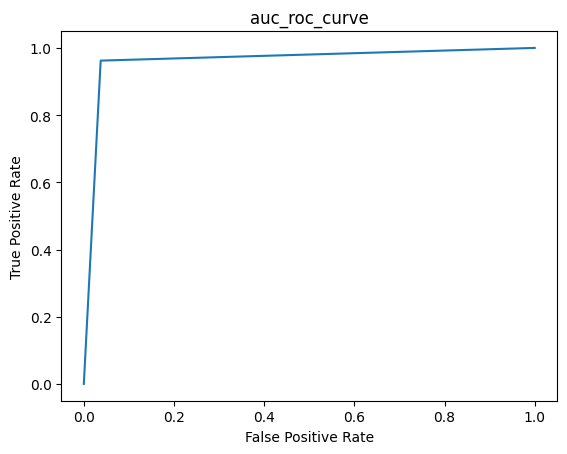

In [43]:
y_pred = clf_best.predict(X_test_s)
fpr, tpr, _ = metrics.roc_curve(Y_test_s, Y_pred_s)
auc = metrics.roc_auc_score(Y_test_s, Y_pred_s)

print('area under the curve is ',auc)
plt.plot(fpr,tpr,label="3 neighbours , AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('auc_roc_curve')
plt.show()


**MLP**

In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
from keras.datasets import mnist
from keras.layers import *
from keras.models import *
from time import time


In [45]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [46]:
X_train.shape
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [47]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

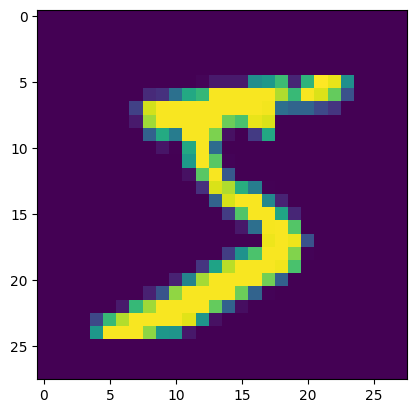

In [48]:
plt.imshow(X_train[0])

In [49]:
X_train=X_train/ 255
X_test = X_test/255

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               100480    
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.fit(X_train,y_train,epochs=10,validation_split=0.2)


Epoch 1/10
1500/1500 [==============================] - 7s 4ms/step - loss: 0.2813 - accuracy: 0.9199 - val_loss: 0.1725 - val_accuracy: 0.9498
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1267 - accuracy: 0.9622 - val_loss: 0.1100 - val_accuracy: 0.9672
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0856 - accuracy: 0.9741 - val_loss: 0.1017 - val_accuracy: 0.9700
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0628 - accuracy: 0.9813 - val_loss: 0.0921 - val_accuracy: 0.9718
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0825 - val_accuracy: 0.9747
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0378 - accuracy: 0.9891 - val_loss: 0.0804 - val_accuracy: 0.9765
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0293 - accuracy: 0.9906 - val_loss: 0.0812 - val_accuracy:

In [51]:
results = model.evaluate(X_test,  y_test, verbose = 0)
print('test loss, test acc:', results)


test loss, test acc: [0.08373548090457916, 0.9763000011444092]


**CNN**

In [52]:
from numpy import argmax,unique
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [53]:
(x_train,y_train),(x_test,y_test) = load_data()

In [54]:
x_train=x_train.reshape((x_train.shape[0],x_train.shape[1],x_train.shape[2],1))
x_test=x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

In [55]:
x_train=x_train.astype('float32')/255.0
x_test=x_test.astype('float32')/255.0

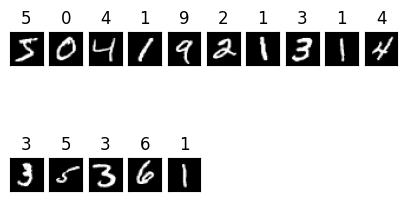

In [56]:
fig= plt.figure(figsize=(5,3))
for i in range(15):
    ax= fig.add_subplot(2,10,i+1,xticks=[],yticks=[])
    ax.imshow(np.squeeze(x_train[i]),cmap='gray')
    ax.set_title(y_train[i])

In [57]:
from tensorflow.keras import Sequential



In [58]:
img_shape=x_train.shape[1:]
print(img_shape)

(28, 28, 1)


In [59]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=img_shape))
model.add(MaxPool2D(2,2))
model.add(Conv2D(48,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dense(10,activation='softmax'))

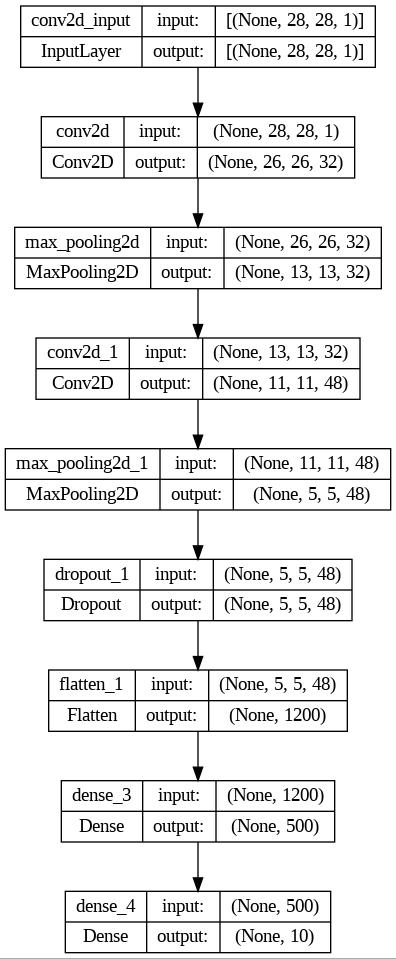

In [60]:
plot_model(model,'model.jpg',show_shapes=True)


In [61]:
model.compile(optimizer='adam',loss="sparse_categorical_crossentropy",metrics=['accuracy'])
x=model.fit(x_train,y_train,epochs=10,batch_size=128,verbose=2,validation_split=0.1)

Epoch 1/10
422/422 - 9s - loss: 0.2401 - accuracy: 0.9268 - val_loss: 0.0585 - val_accuracy: 0.9840 - 9s/epoch - 21ms/step
Epoch 2/10
422/422 - 2s - loss: 0.0811 - accuracy: 0.9751 - val_loss: 0.0382 - val_accuracy: 0.9903 - 2s/epoch - 4ms/step
Epoch 3/10
422/422 - 2s - loss: 0.0602 - accuracy: 0.9809 - val_loss: 0.0356 - val_accuracy: 0.9898 - 2s/epoch - 4ms/step
Epoch 4/10
422/422 - 2s - loss: 0.0493 - accuracy: 0.9842 - val_loss: 0.0329 - val_accuracy: 0.9903 - 2s/epoch - 4ms/step
Epoch 5/10
422/422 - 2s - loss: 0.0421 - accuracy: 0.9866 - val_loss: 0.0352 - val_accuracy: 0.9900 - 2s/epoch - 4ms/step
Epoch 6/10
422/422 - 2s - loss: 0.0362 - accuracy: 0.9885 - val_loss: 0.0273 - val_accuracy: 0.9923 - 2s/epoch - 5ms/step
Epoch 7/10
422/422 - 2s - loss: 0.0311 - accuracy: 0.9895 - val_loss: 0.0262 - val_accuracy: 0.9927 - 2s/epoch - 4ms/step
Epoch 8/10
422/422 - 2s - loss: 0.0305 - accuracy: 0.9895 - val_loss: 0.0273 - val_accuracy: 0.9928 - 2s/epoch - 4ms/step
Epoch 9/10
422/422 - 2s

In [62]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=0)
print("Accuracy:",{accuracy*100})

Accuracy: {99.19999837875366}


In [63]:
image=x_train[5]

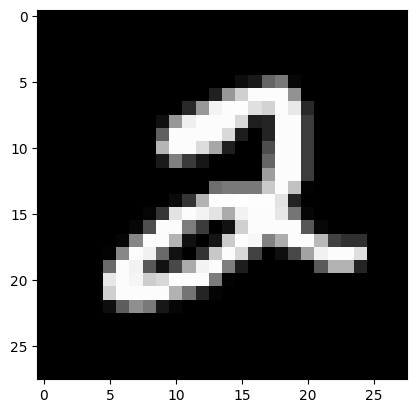

In [65]:
plt.imshow(np.squeeze(image),cmap='gray')
plt.show()

In [66]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])

In [67]:
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 145ms/step
Predicted: 2
